In [1]:
import pandas as analytics
import os
import matplotlib.pyplot as graph
import numpy as maths
from math import log
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('../data/')

In [3]:
filename = 'ionosphere.data'

# Manual Preprocessing

In [20]:
df_raw = analytics.read_csv(filename,header=None)
df_raw

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [21]:
# df_raw = df_raw.drop(['sex','age'],axis =1)
df_raw.to_csv('check.csv',header=None,index =False)
df_raw = analytics.read_csv('check.csv',header=None)

In [22]:
cols = ['x'+str(i+1) for i in df_raw.columns[:-1]] + ['y']
df_raw.columns = cols
df_raw['y'] = df_raw['y'].replace('g',0).replace('b',1)
df_raw = df_raw.drop('x2',axis = 1)
df_raw

,x1,x3,x4,x5,x6,x7,x8,x9,x10,x11,...,x26,x27,x28,x29,x30,x31,x32,x33,x34,y
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,0
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,0
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,0
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,0


# Working Processing

In [23]:
training_perc = 0.7

In [24]:
training_number =  int(training_perc * len(df_raw))
df_raw = df_raw.sample(frac = 1)
df_train = df_raw[:training_number]
df_test = df_raw[training_number:]

In [25]:
maxima = {}
minima = {}
for col in df_raw.columns[:-1]:
    maxima.update({col:df_train[col].max()})
    minima.update({col:df_train[col].min()})    
    df_train[col] = (df_train[col] - minima[col])/(maxima[col] - minima[col])
df_train

,x1,x3,x4,x5,x6,x7,x8,x9,x10,x11,...,x26,x27,x28,x29,x30,x31,x32,x33,x34,y
344,1.0,0.880230,0.505460,0.931675,0.501290,0.929105,0.501920,0.899940,0.511520,0.907520,...,0.498485,0.854430,0.506875,0.830805,0.504245,0.831490,0.507420,0.819435,0.507625,0
182,0.0,0.000000,1.000000,1.000000,0.000000,0.500000,0.500000,0.500000,0.500000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.500000,1
124,1.0,1.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.738720,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.500000,0.500000,0.500000,0.500000,1
147,1.0,1.000000,0.494595,1.000000,0.486485,1.000000,0.467570,0.975675,0.491890,0.994595,...,0.545945,0.992780,0.506255,1.000000,0.483785,1.000000,0.513515,1.000000,0.464865,0
60,1.0,1.000000,0.548855,1.000000,0.560985,1.000000,0.612870,0.993010,0.546185,0.974650,...,0.673290,0.842260,0.713730,0.813820,0.730155,0.783955,0.735165,0.771260,0.754515,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1.0,0.924215,0.533970,0.902810,0.488505,0.885155,0.483505,0.833625,0.466900,0.797910,...,0.385890,0.743295,0.454360,0.763065,0.457315,0.721385,0.451895,0.711115,0.450960,0
172,0.0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,0.500000,1
84,1.0,0.874260,0.485945,0.828400,0.474110,0.903105,0.514055,0.929735,0.512575,0.817310,...,0.514055,0.805045,0.466815,0.767750,0.394230,0.795120,0.429735,0.781805,0.514795,0
291,1.0,0.799435,0.573445,0.849340,0.430320,0.925610,0.430320,0.904895,0.512240,0.752355,...,0.334275,0.807220,0.415815,0.763655,0.489640,0.769305,0.343690,0.837100,0.389830,0


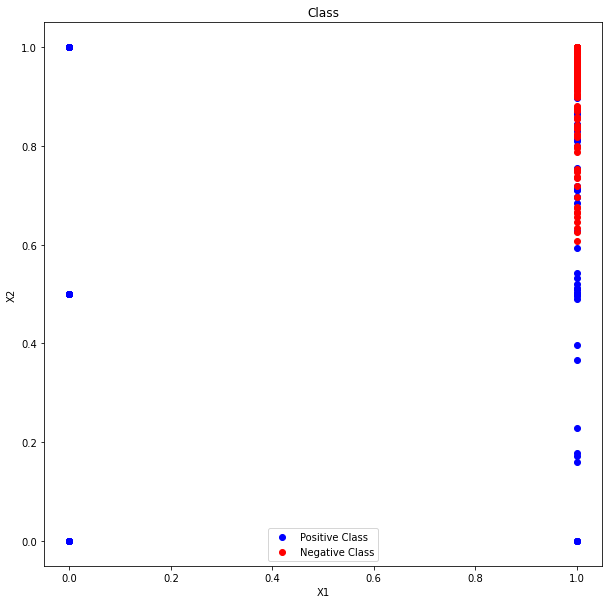

In [27]:
df_pos = df_train[df_train['y'] == 1]
df_neg = df_train[df_train['y'] == 0]
figure = graph.figure(figsize=(10,10))
graph.scatter(df_pos['x1'], df_pos['x3'], c = 'blue',label = 'Positive Class')
graph.scatter(df_neg['x1'], df_neg['x3'], c = 'red', label = 'Negative Class')
graph.title("Class")
graph.xlabel("X1")
graph.ylabel("X2")
graph.legend()
graph.show()

In [28]:
mu_pos = df_pos.iloc[:,:-1].mean()
mu_neg = df_neg.iloc[:,:-1].mean()

In [29]:
x_p = (df_pos - mu_pos).iloc[:,:-1]
x_n = (df_neg - mu_neg).iloc[:,:-1]

In [30]:
covariance_matrix_pos = (x_p.T @ x_p) / (len(x_p) - 1)
covariance_matrix_neg = (x_n.T @ x_n) / (len(x_n) - 1 ) 

In [31]:
covariance_matrix = ((len(x_p) - 1 )*covariance_matrix_pos + (len(x_n) - 1 )*covariance_matrix_neg)/((len(x_n) - 1 ) + (len(x_p) - 1 ))
covariance_matrix

,x1,x10,x11,x12,x13,x14,x15,x16,x17,x18,...,x31,x32,x33,x34,x4,x5,x6,x7,x8,x9
x1,0.080904,-0.008278,-0.005584,0.001926,0.002301,0.008126,0.002246,0.003749,0.001619,-0.003453,...,-0.000956,-0.011457,0.002332,-0.003814,0.000899,-0.006055,0.001571,-0.004512,-0.009837,0.004109
x10,-0.008278,0.059156,-0.020674,0.025004,-0.033884,0.018812,-0.028601,0.021666,-0.026377,0.009419,...,-0.009731,-0.000437,-0.013406,0.007447,0.005315,-0.007844,0.010383,-0.009966,0.023815,-0.014540
x11,-0.005584,-0.020674,0.079753,-0.014343,0.049691,-0.017427,0.055272,-0.002632,0.069218,0.005489,...,0.021906,0.000509,0.021604,-0.009875,-0.013281,0.029846,-0.018740,0.022857,-0.030600,0.046964
x12,0.001926,0.025004,-0.014343,0.063270,-0.012709,0.021927,-0.011508,0.015110,-0.022857,0.005728,...,-0.012533,0.001311,-0.009699,0.002738,0.012480,0.000357,0.007648,0.000325,0.020753,-0.008986
x13,0.002301,-0.033884,0.049691,-0.012709,0.093922,-0.008908,0.080714,-0.012476,0.061935,-0.006579,...,0.026992,-0.006437,0.032382,-0.003540,-0.006418,0.030553,-0.027482,0.040589,-0.028875,0.037445
x14,0.008126,0.018812,-0.017427,0.021927,-0.008908,0.061122,-0.013788,0.005169,-0.024219,0.018171,...,-0.016616,-0.006182,-0.011202,0.006397,0.011506,0.000149,0.002674,-0.000438,0.006355,-0.005577
x15,0.002246,-0.028601,0.055272,-0.011508,0.080714,-0.013788,0.101671,-0.010594,0.072307,0.000848,...,0.035867,-0.001166,0.037734,-0.007562,-0.018417,0.024675,-0.029924,0.043294,-0.034561,0.046602
x16,0.003749,0.021666,-0.002632,0.015110,-0.012476,0.005169,-0.010594,0.051555,-0.010951,0.016079,...,-0.011627,0.007515,-0.011227,0.016113,0.008141,0.000920,0.004245,-0.002513,0.023021,-0.005062
x17,0.001619,-0.026377,0.069218,-0.022857,0.061935,-0.024219,0.072307,-0.010951,0.098703,0.001045,...,0.029285,0.000191,0.025216,-0.004513,-0.014420,0.022835,-0.025008,0.026068,-0.037145,0.049736
x18,-0.003453,0.009419,0.005489,0.005728,-0.006579,0.018171,0.000848,0.016079,0.001045,0.064714,...,-0.014582,0.020763,-0.005205,0.003004,-0.008103,-0.002128,0.010196,0.000944,0.003723,0.011027


In [25]:
mu_pos = df_pos.iloc[:,:-1].mean()
mu_neg = df_neg.iloc[:,:-1].mean()

In [32]:
covariance_matrix_inv = maths.linalg.inv(covariance_matrix)
covariance_matrix_inv

array([[ 2.15338329e+01,  5.83806733e+00,  7.91614716e+00, ...,
         7.54375734e+00,  1.70104237e+00,  2.47851282e+00],
       [ 5.83806733e+00,  3.66337304e+01,  3.69730970e+00, ...,
        -2.89065074e+00, -2.90789482e+00,  2.51804755e+00],
       [ 7.91614716e+00,  3.69730970e+00,  5.90250128e+01, ...,
         5.82073736e+00,  1.89670314e+00, -1.77759786e+01],
       ...,
       [ 7.54375734e+00, -2.89065074e+00,  5.82073736e+00, ...,
         5.92233385e+01, -1.75796750e+00,  1.25377626e+01],
       [ 1.70104237e+00, -2.90789482e+00,  1.89670314e+00, ...,
        -1.75796750e+00,  3.88678099e+01, -4.01844932e-02],
       [ 2.47851282e+00,  2.51804755e+00, -1.77759786e+01, ...,
         1.25377626e+01, -4.01844932e-02,  7.01323660e+01]])

In [33]:
w = covariance_matrix_inv @ maths.array(mu_pos - mu_neg)
w = maths.array(w).reshape(-1,1)
w.shape

(33, 1)

In [34]:
pi_pos = len(df_pos)/len(df_train)
pi_neg = len(df_neg)/len(df_train)

In [35]:
w0 = (- 0.5 * mu_pos @ covariance_matrix_inv @ mu_pos.T) + (0.5 * mu_neg @ covariance_matrix_inv @ mu_neg.T) + log(abs(pi_pos / pi_neg))
w0

29.136283474709046

In [36]:
hyperplane = -((w[0] * df_train['x1'])  + w0)/w[1]

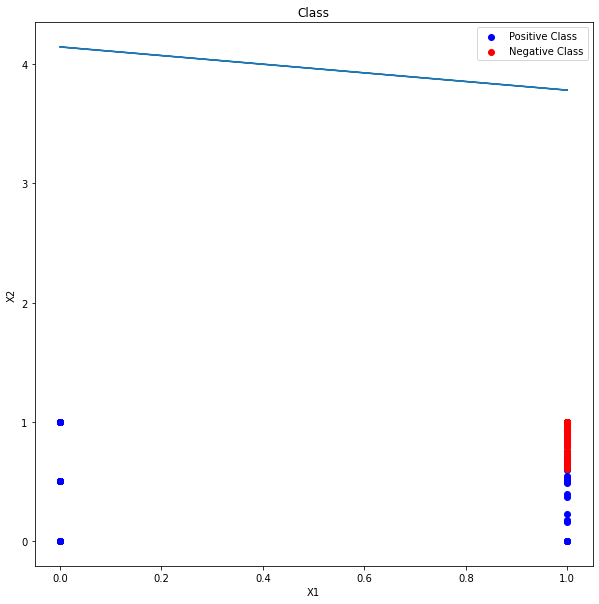

In [38]:
figure = graph.figure(figsize=(10,10))
graph.scatter(df_pos['x1'], df_pos['x3'], c = 'blue',label = 'Positive Class')
graph.scatter(df_neg['x1'], df_neg['x3'], c = 'red', label = 'Negative Class')
graph.title("Class")
graph.xlabel("X1")
graph.ylabel("X2")
graph.legend()
graph.plot(df_train['x1'],hyperplane)
graph.show()

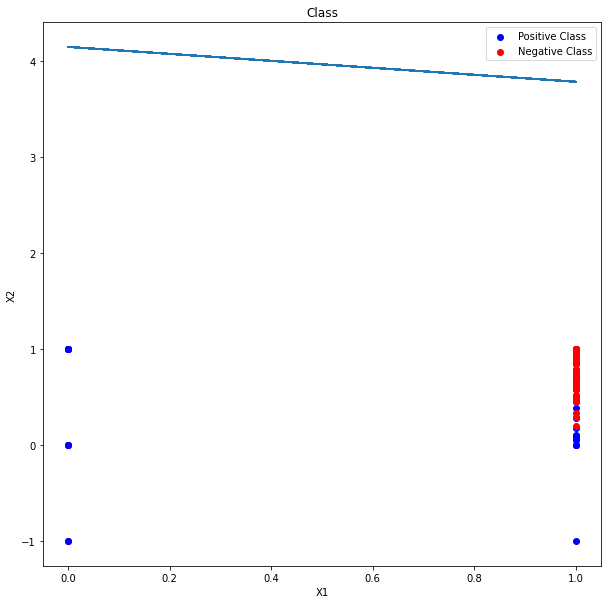

In [40]:
df_test_pos = df_test[df_test['y'] == 1]
df_test_neg = df_test[df_test['y'] == 0]

test_hyperplane = -((w[0] * df_test['x1'])  + w0)/w[1]

figure = graph.figure(figsize=(10,10))
graph.scatter(df_test_pos['x1'], df_test_pos['x3'], c = 'blue',label = 'Positive Class')
graph.scatter(df_test_neg['x1'], df_test_neg['x3'], c = 'red', label = 'Negative Class')
graph.title("Class")
graph.xlabel("X1")
graph.ylabel("X2")
graph.legend()
graph.plot(df_test['x1'],test_hyperplane)
graph.show()